# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset diporeleh dari kaggle pada link berikut:
   https://www.kaggle.com/datasets/lmno3418/pokedex-pokemon-data/data
2. **Perkenalan Singkat**:  
   Dataset ini memberikan data pertarungan antara pokemon yang umum ada. Dataset berisi berbagai data terkait pokemon yang bertarung,serta pemenang dari setiap pertarungannya. Proyek ini bertujuan untuk memperkirakan pemenang dari setiap pertarungan pokemon.Harapannya proyek ini dapat menjadi landasan untuk mengembangkan permainan pokemon, mengenalkan machine-learning ke masyarakat, dan menjadi sarana pembelajaran bagi penulis.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [ ]:
pip install dython


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from dython.nominal import associations
from sklearn.preprocessing import LabelEncoder


# **3. Memuat Dataset**

Pada tahap ini dataset dimuat sebagai berikut

In [ ]:
df=pd.read_csv("pokemon_dataset_raw.csv")

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Dilakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset,memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38054 entries, 0 to 38053
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   First_pokemon_id        38054 non-null  int64 
 1   Second_pokemon_id       38054 non-null  int64 
 2   Winner                  38054 non-null  int64 
 3   Name_first              38054 non-null  object
 4   Type 1_first            38054 non-null  object
 5   Type 2_first            38054 non-null  object
 6   HP_first                38054 non-null  int64 
 7   Attack_first            38054 non-null  int64 
 8   Defense_first           38054 non-null  int64 
 9   Sp. Atk_first           38054 non-null  int64 
 10  Sp. Def_first           38054 non-null  int64 
 11  Speed_first             38054 non-null  int64 
 12  Generation_first        38054 non-null  int64 
 13  Legendary_first         38054 non-null  bool  
 14  height_first            38054 non-null  int64 
 15  we

In [ ]:
# Mengatur agar semua kolom ditampilkan
pd.set_option('display.max_columns', None)

# Sekarang df.head() akan menampilkan seluruh kolom
print(df.head())

   First_pokemon_id  Second_pokemon_id  Winner Name_first Type 1_first  \
0               266                298     298   Larvitar         Rock   
1               702                701     701   Virizion        Grass   
2               191                668     668    Togetic        Fairy   
3               237                683     683     Slugma         Fire   
4               151                231     151    Omastar         Rock   

  Type 2_first  HP_first  Attack_first  Defense_first  Sp. Atk_first  \
0       Ground        50            64             50             45   
1     Fighting        91            90             72             90   
2       Flying        55            40             85             80   
3       Normal        40            40             40             70   
4        Water        70            60            125            115   

   Sp. Def_first  Speed_first  Generation_first  Legendary_first  \
0             50           41                 2       

dapat dilihat bahwa dataset mengandung data id masing-masing pokemon yang bertarung,data pokemon yang bertarung, serta pemenang. Untuk mempermudah analisa maka dilakukan penambahan kolom yakni first winner yakni apakah pokemon pertama menang, sehingga dapat diidentifikasi faktor yang mempengaruhi kemenangan pokemon yang independen dari ID pokemon tersebut.

In [ ]:
#pembuatan kolom first_winner

df['first_winner'] = (df['First_pokemon_id'] == df['Winner']).astype(int)


In [ ]:
# Cek kolom boolean
bool_cols = df.select_dtypes(include='bool').columns.tolist()
print("Kolom boolean:", bool_cols)
no_bool_df=df.copy()
# Konversi ke integer
for col in bool_cols:
    no_bool_df[col] = no_bool_df[col].astype(int)

Kolom boolean: ['Legendary_first', 'Legendary_second']


In [ ]:
no_bool_df.head()

,First_pokemon_id,Second_pokemon_id,Winner,Name_first,Type 1_first,Type 2_first,HP_first,Attack_first,Defense_first,Sp. Atk_first,Sp. Def_first,Speed_first,Generation_first,Legendary_first,height_first,weight_first,base_experience_first,Name_second,Type 1_second,Type 2_second,HP_second,Attack_second,Defense_second,Sp. Atk_second,Sp. Def_second,Speed_second,Generation_second,Legendary_second,height_second,weight_second,base_experience_second,first_winner
0,266,298,298,Larvitar,Rock,Ground,50,64,50,45,50,41,2,0,6,720,60,Nuzleaf,Grass,Dark,70,70,40,60,40,60,3,0,10,280,119,0
1,702,701,701,Virizion,Grass,Fighting,91,90,72,90,129,108,5,1,20,2000,261,Terrakion,Rock,Fighting,91,129,90,72,90,108,5,1,19,2600,261,0
2,191,668,668,Togetic,Fairy,Flying,55,40,85,80,105,40,2,0,6,32,142,Beheeyem,Psychic,Normal,75,75,75,125,95,40,5,0,10,345,170,0
3,237,683,683,Slugma,Fire,Normal,40,40,40,70,40,20,2,0,7,350,50,Druddigon,Dragon,Normal,77,120,90,60,90,48,5,0,16,1390,170,0
4,151,231,151,Omastar,Rock,Water,70,60,125,115,70,55,1,0,10,350,173,Shuckle,Bug,Rock,20,10,230,10,230,5,2,0,6,205,177,1


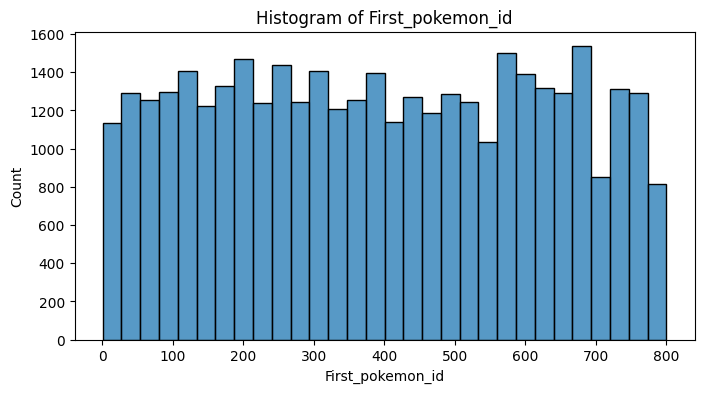

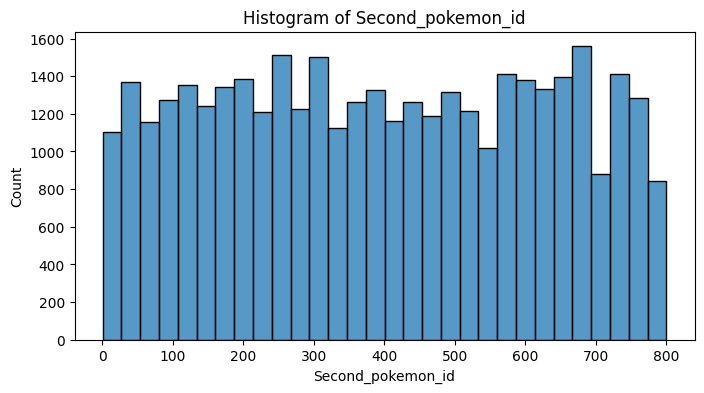

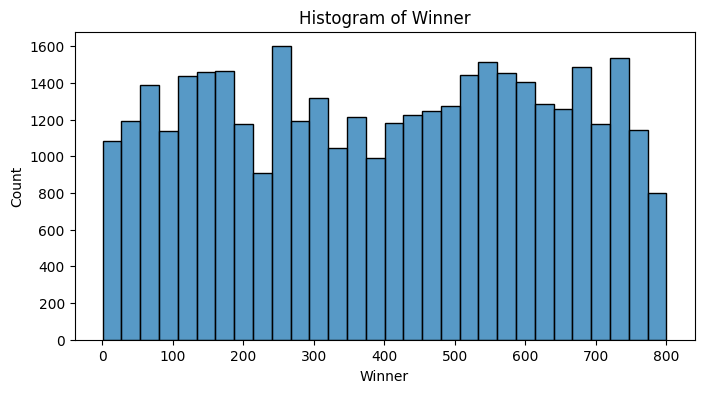

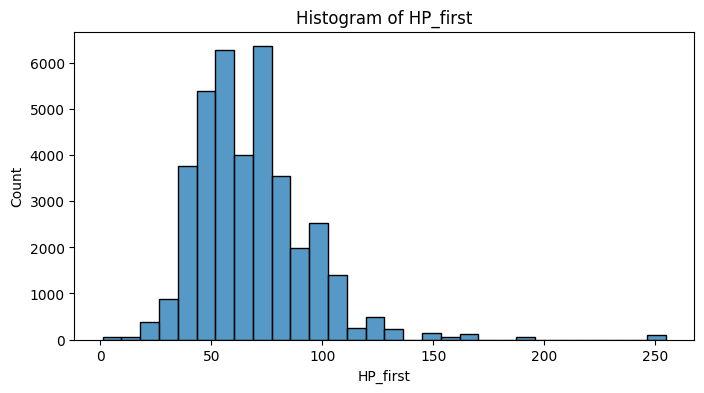

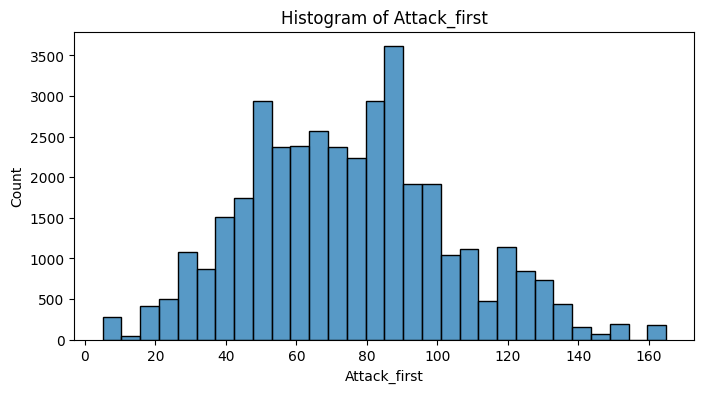

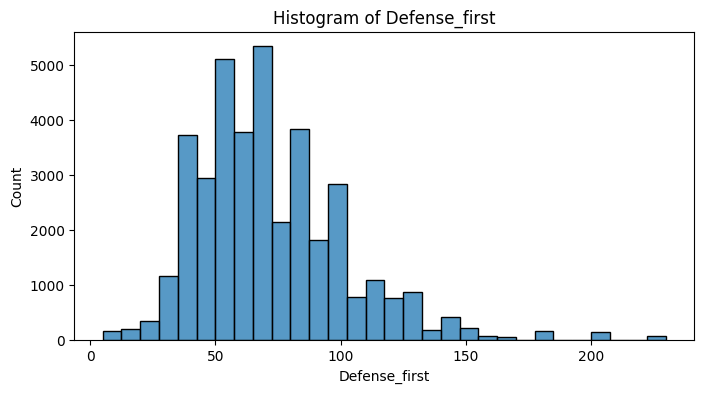

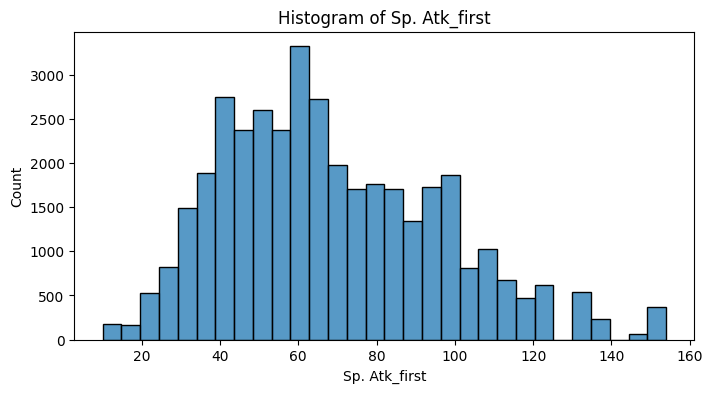

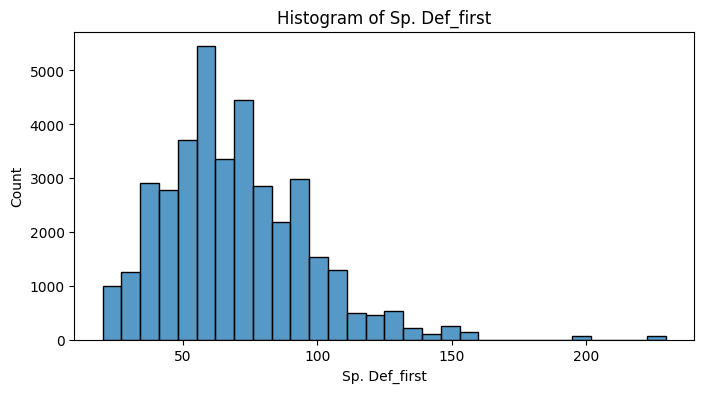

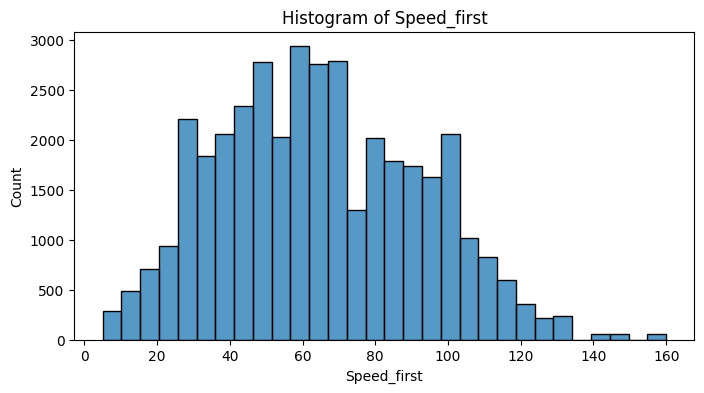

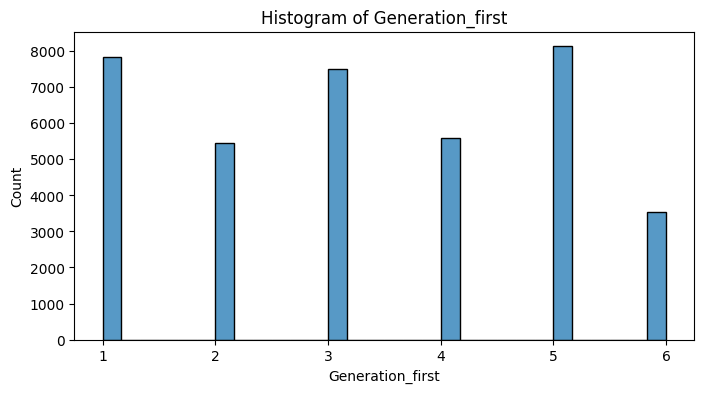

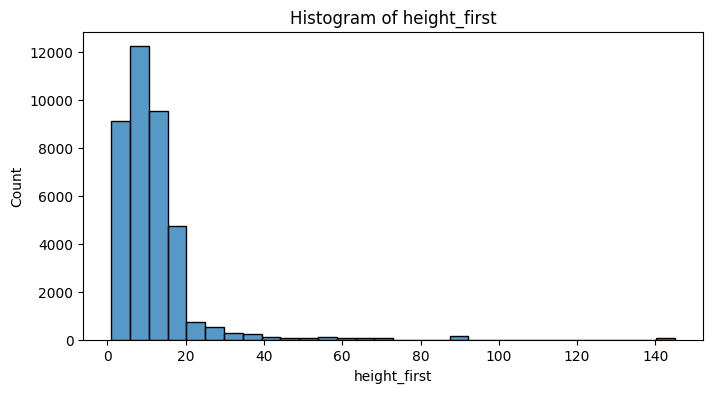

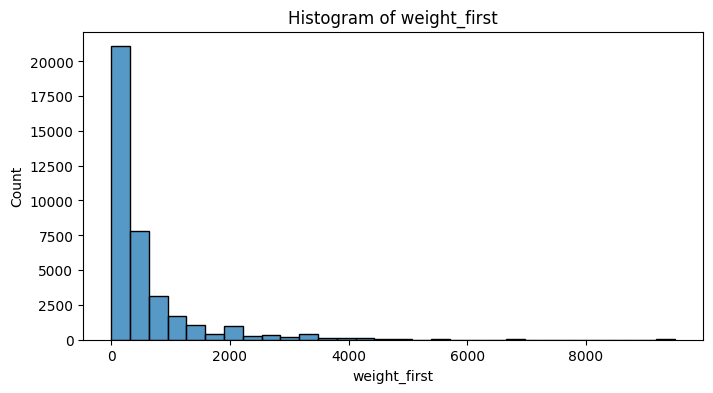

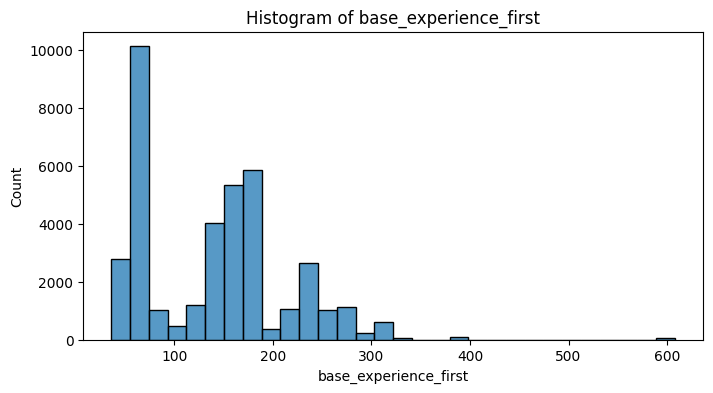

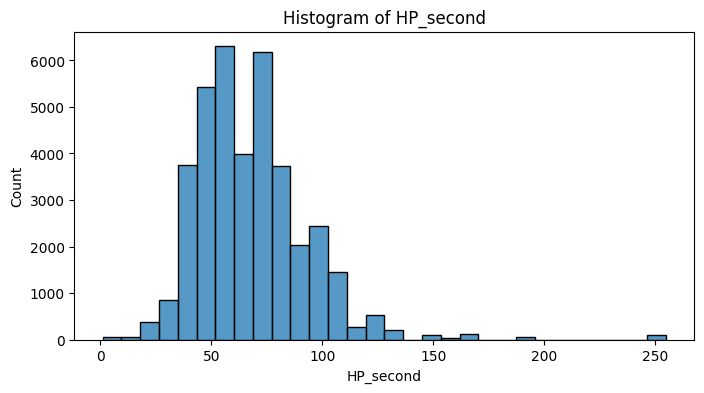

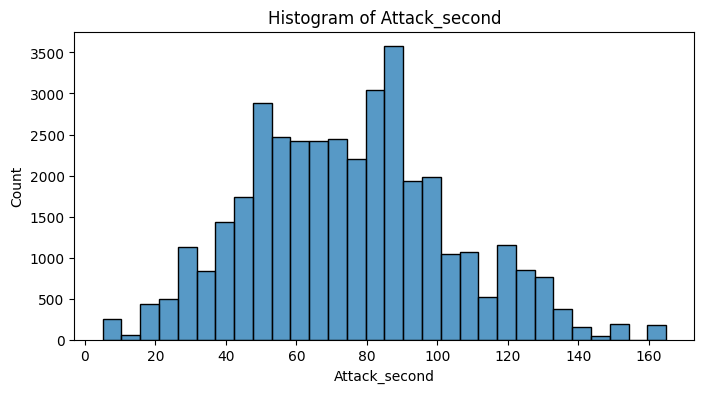

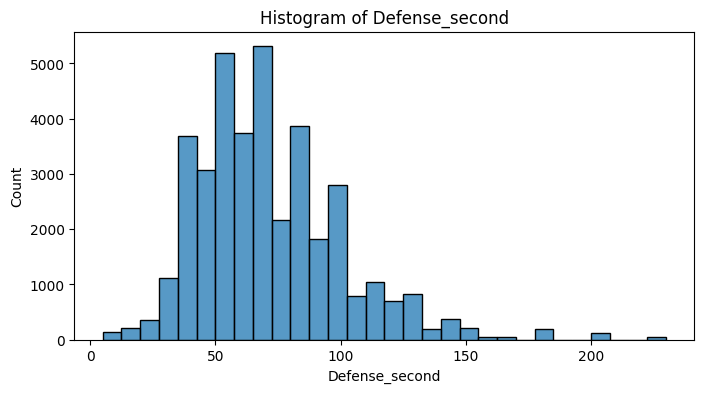

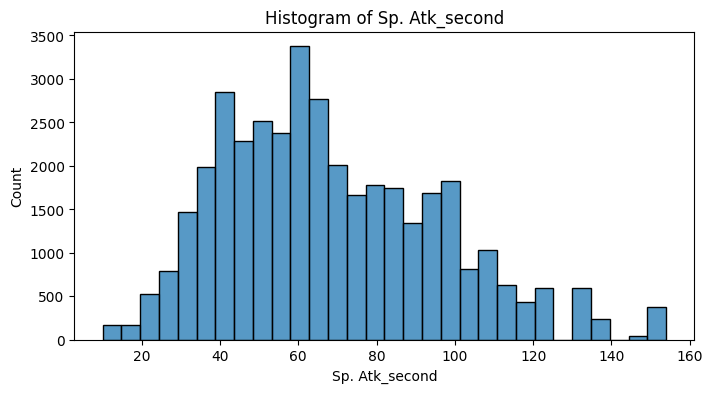

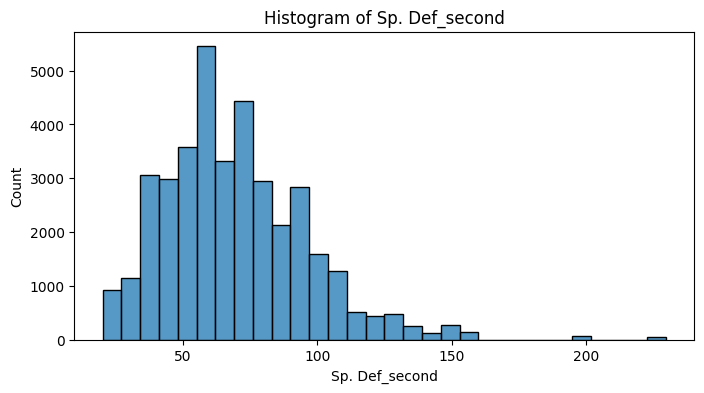

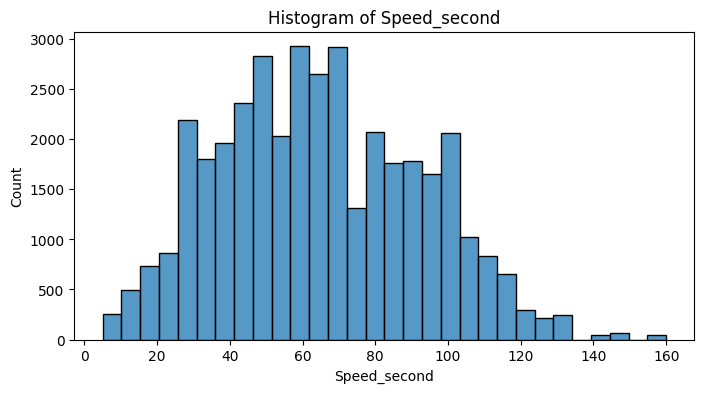

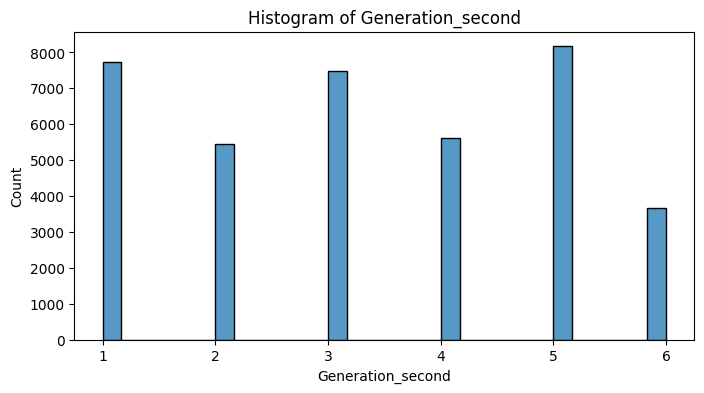

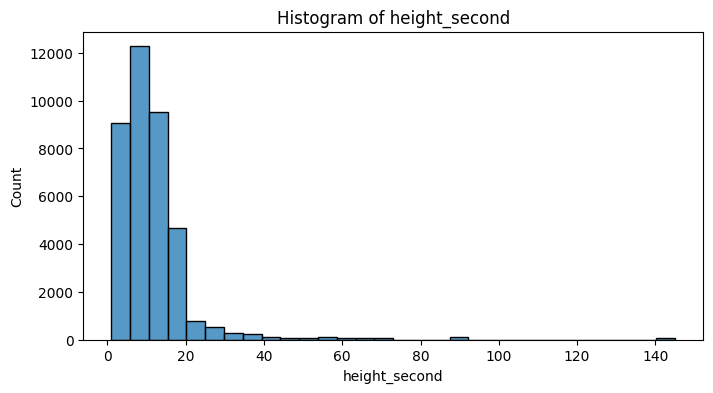

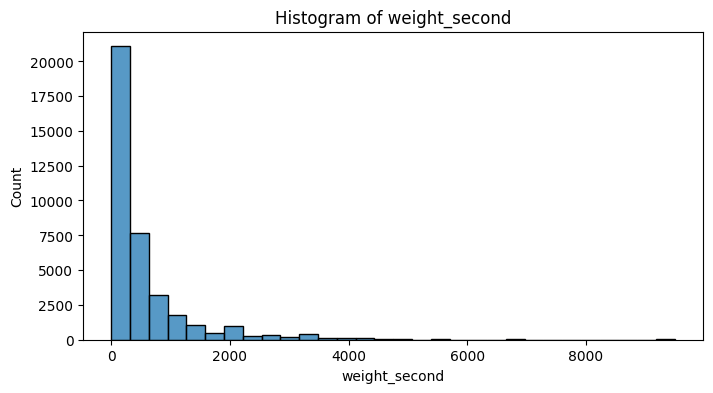

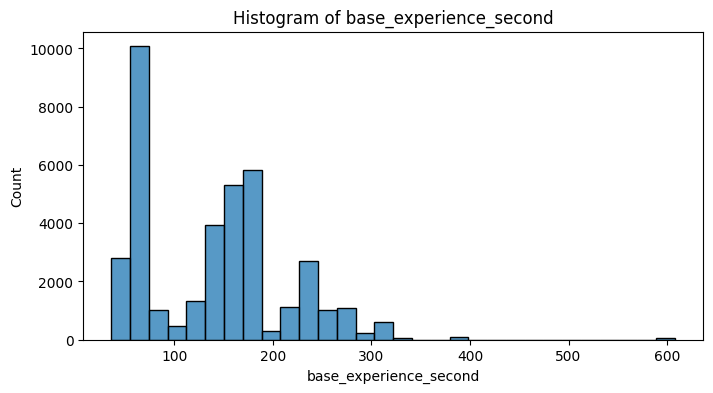

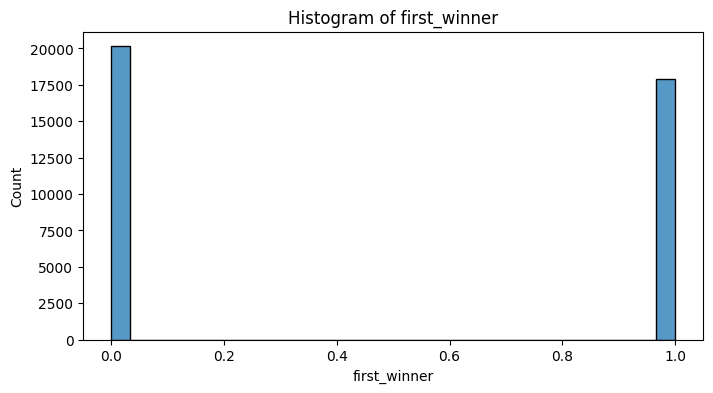

In [ ]:
# Ambil semua kolom numerik dari merged_df
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

# Loop untuk semua kolom numerik dan buat histogram
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=False, bins=30)
    plt.title(f'Histogram of {col}')
    plt.show()

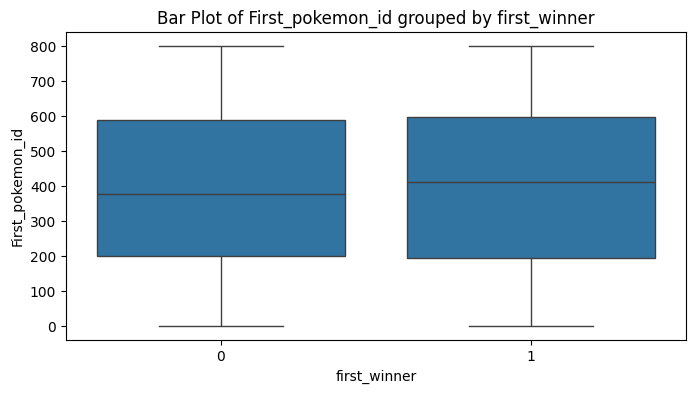

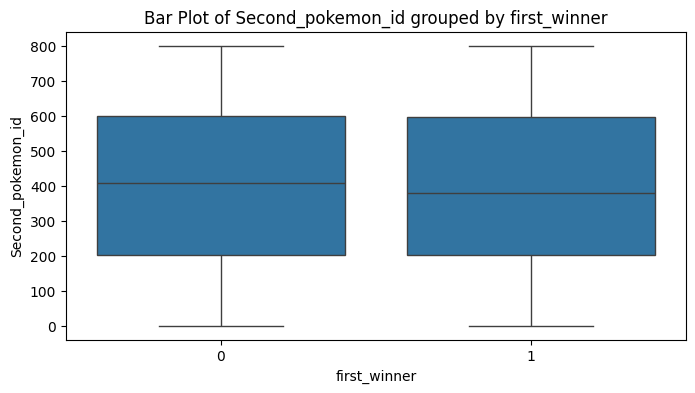

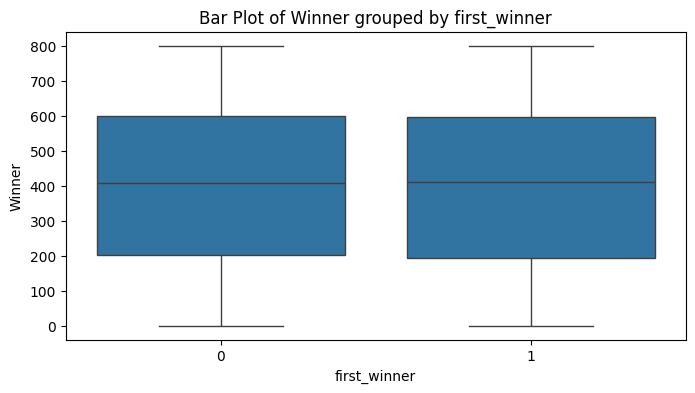

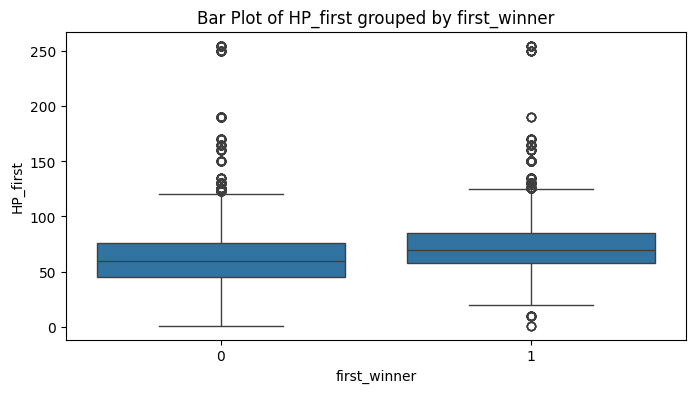

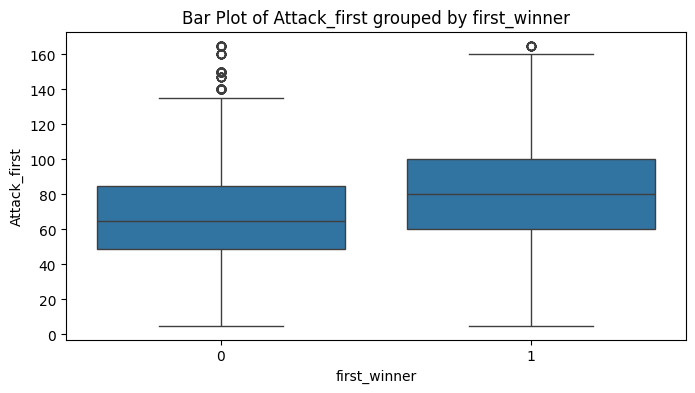

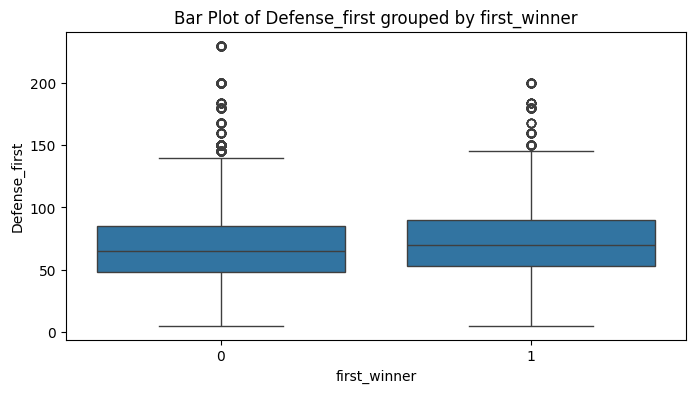

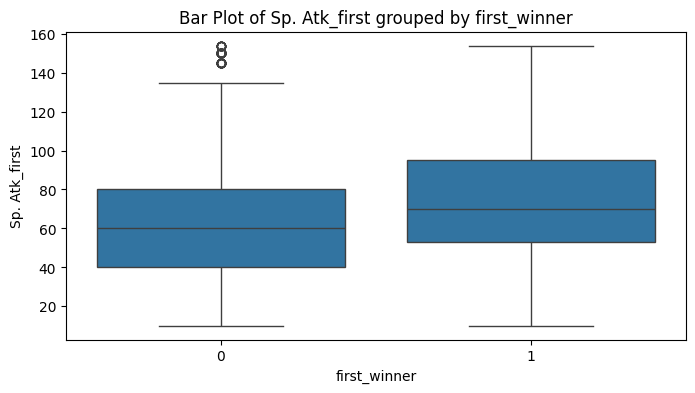

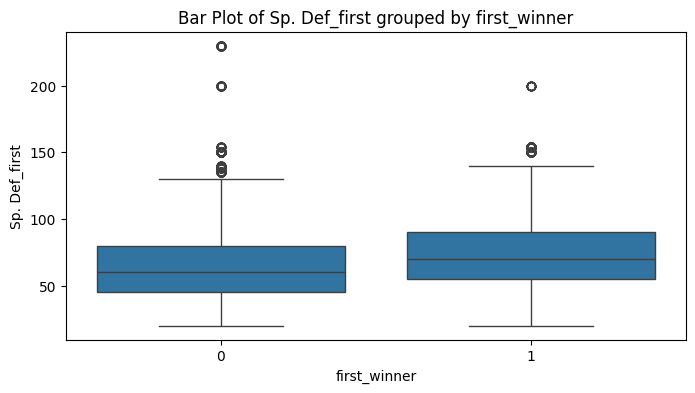

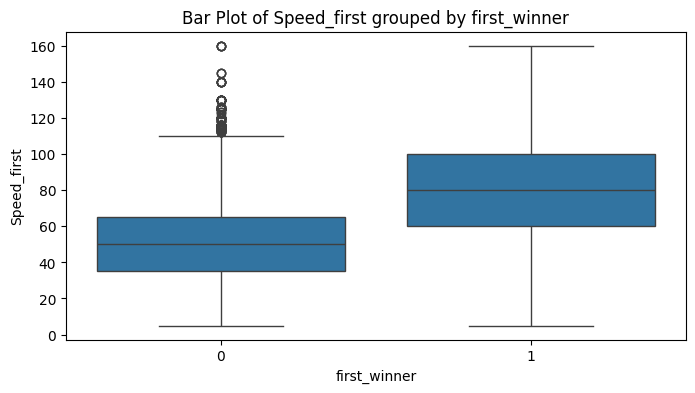

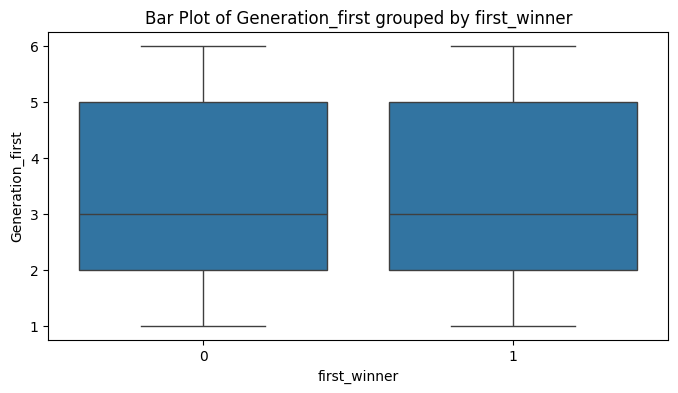

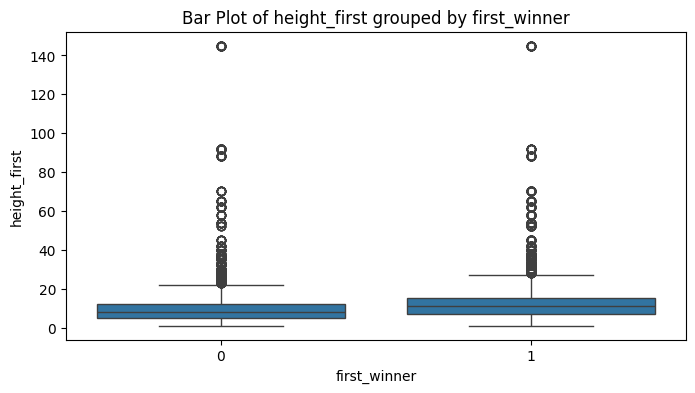

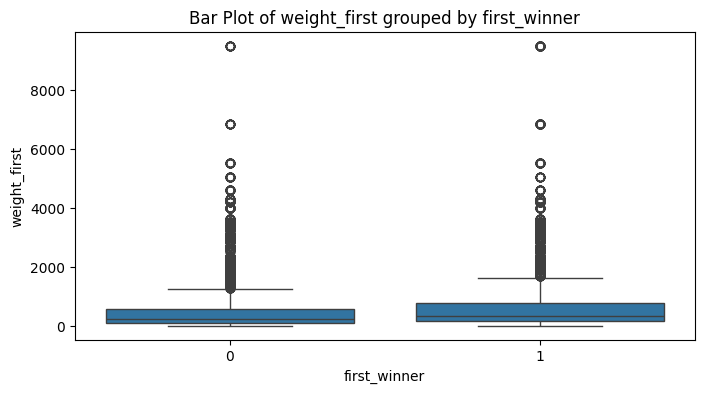

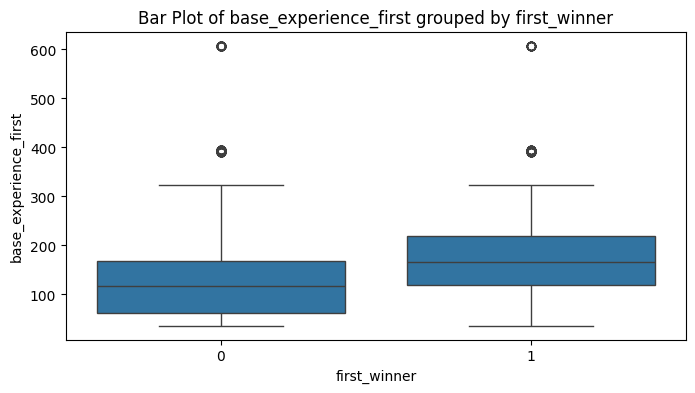

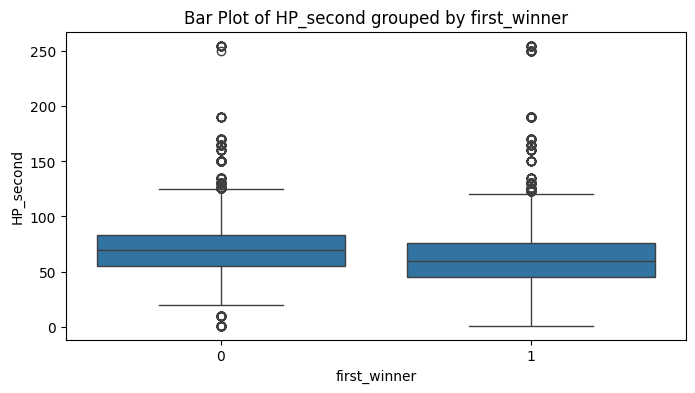

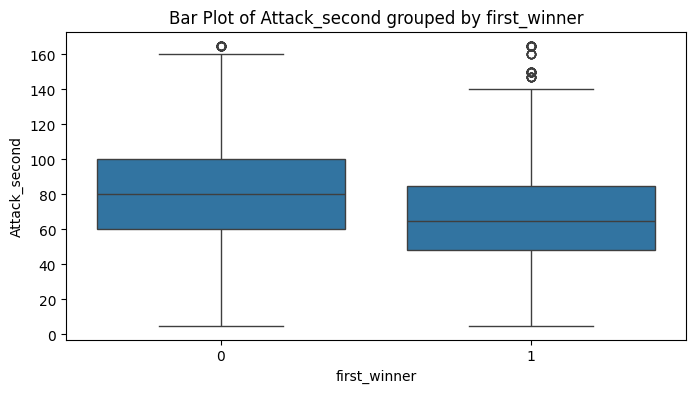

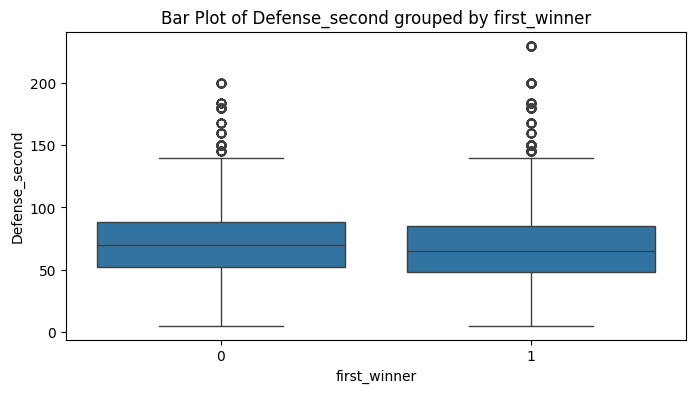

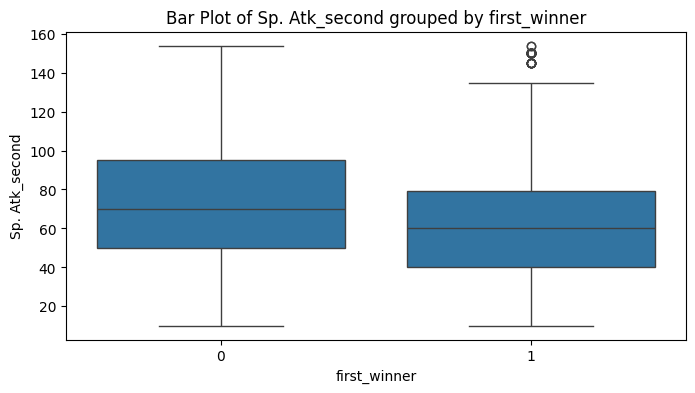

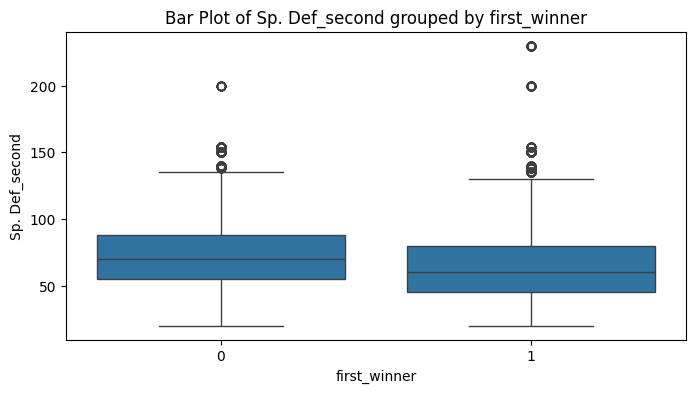

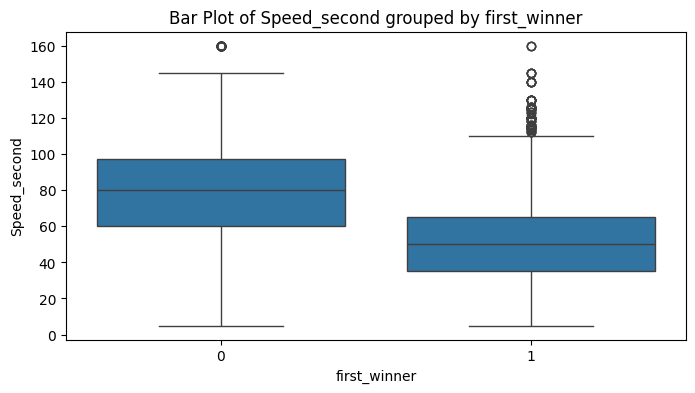

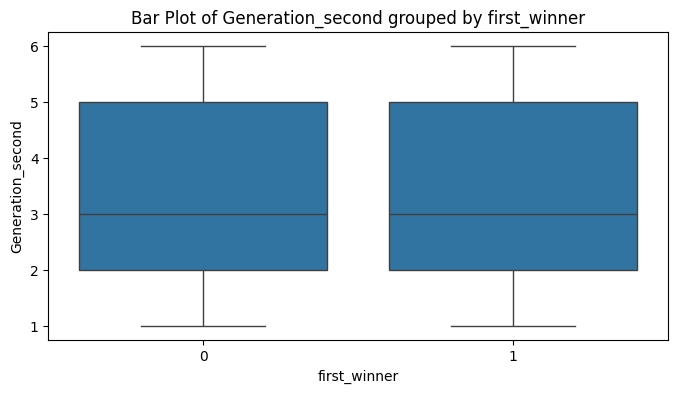

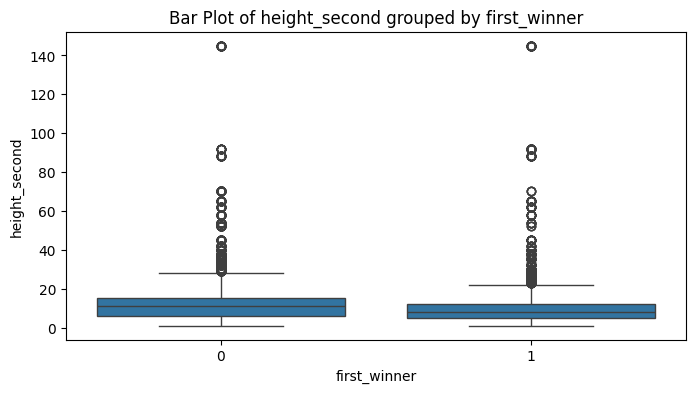

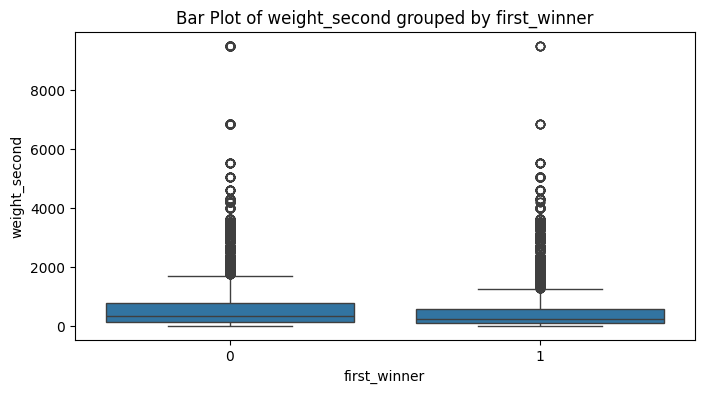

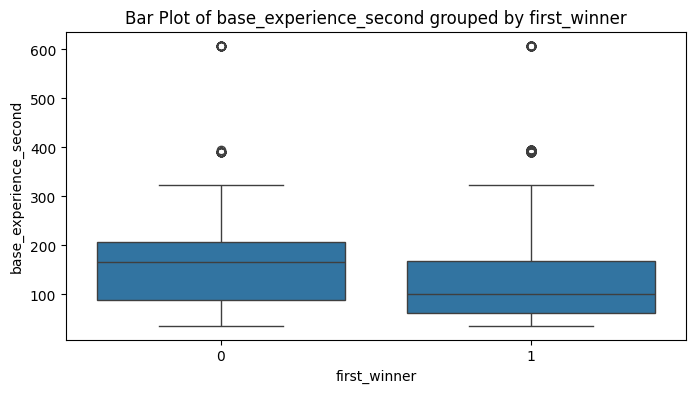

In [ ]:

# Ambil semua kolom numerik
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

# Tentukan nama kolom target
target_col = 'first_winner'

# Loop untuk semua kolom numerik kecuali target
for col in numeric_cols:
    if col != target_col:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df[target_col], y=df[col])
        plt.title(f'Bar Plot of {col} grouped by {target_col}')
        plt.show()


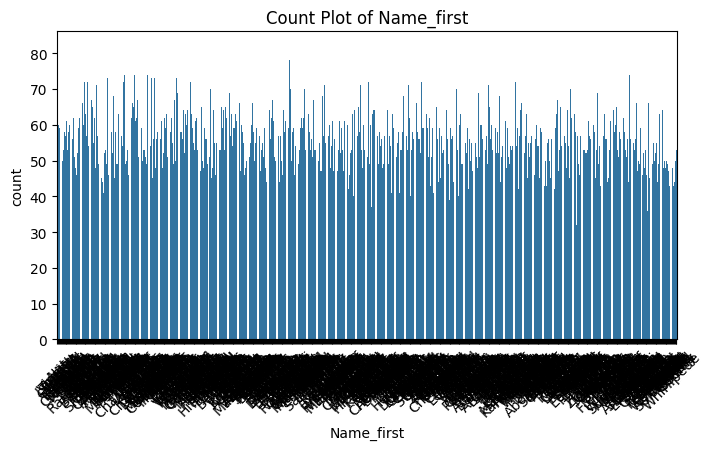

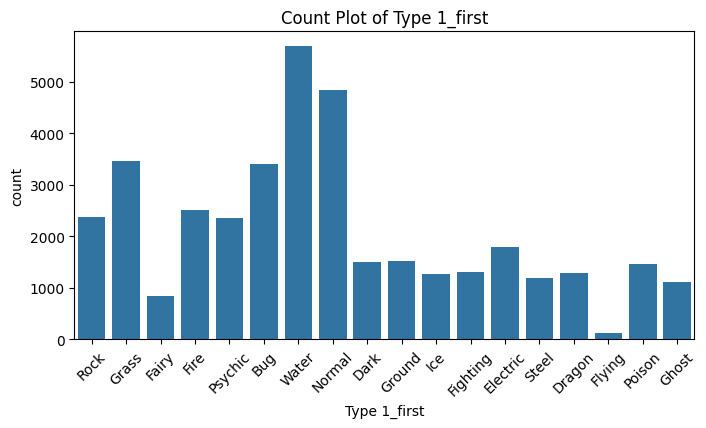

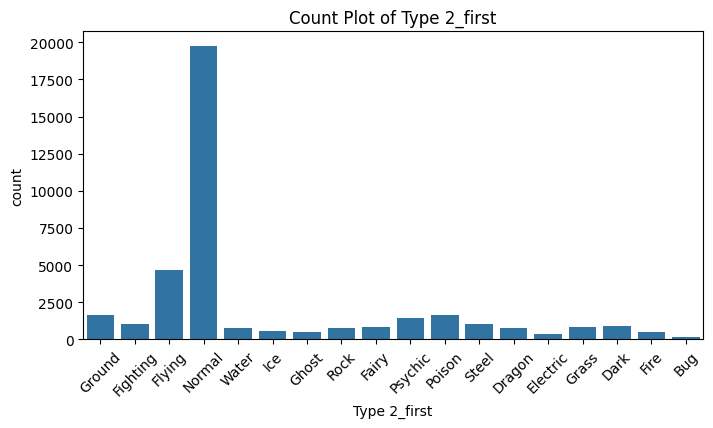

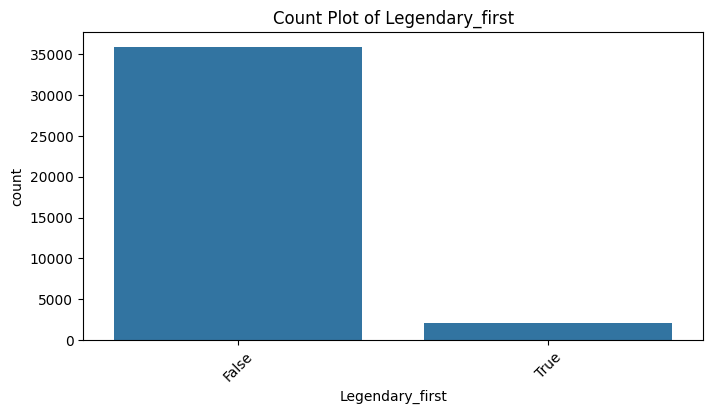

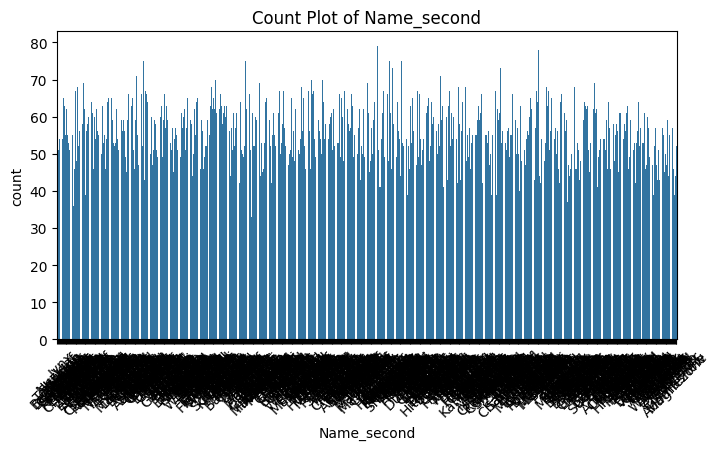

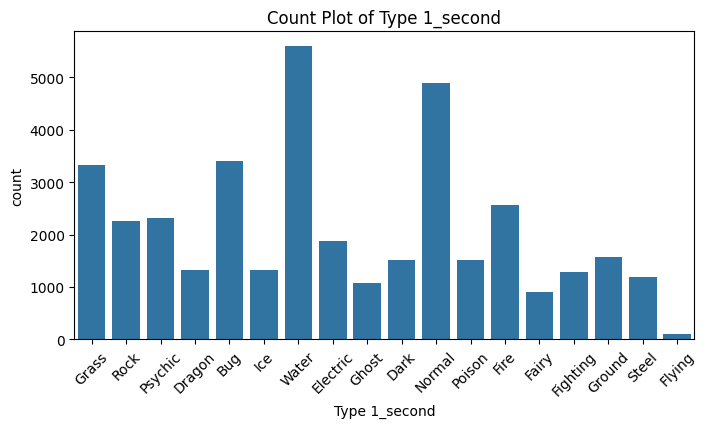

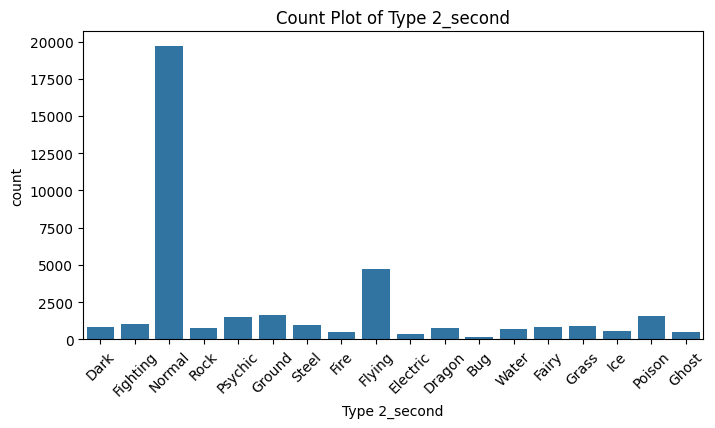

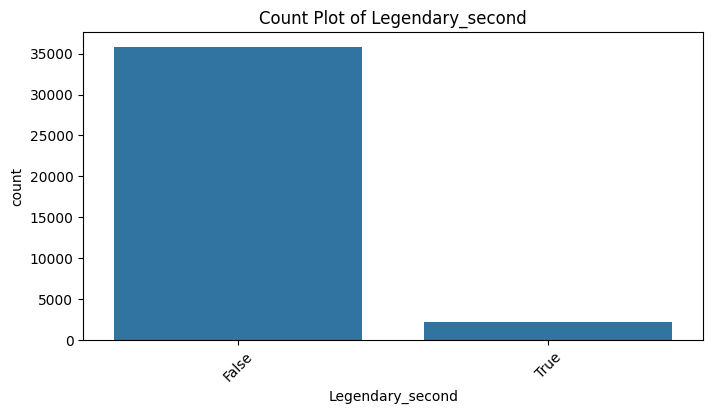

In [ ]:
# Ambil semua kolom kategorik dari merged_df
categorical_cols = df.select_dtypes(include=['object', 'category','boolean']).columns.tolist()

# Loop untuk semua kolom kategorik dan buat countplot
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.show()

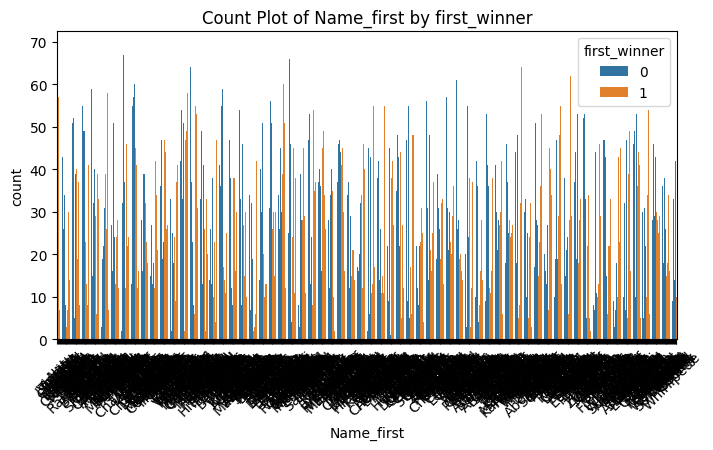

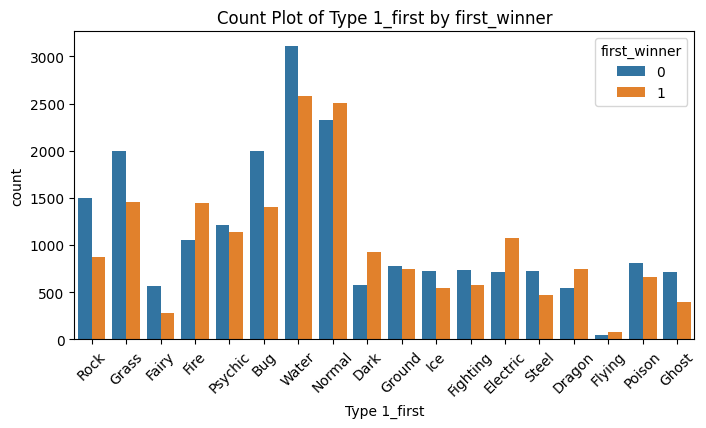

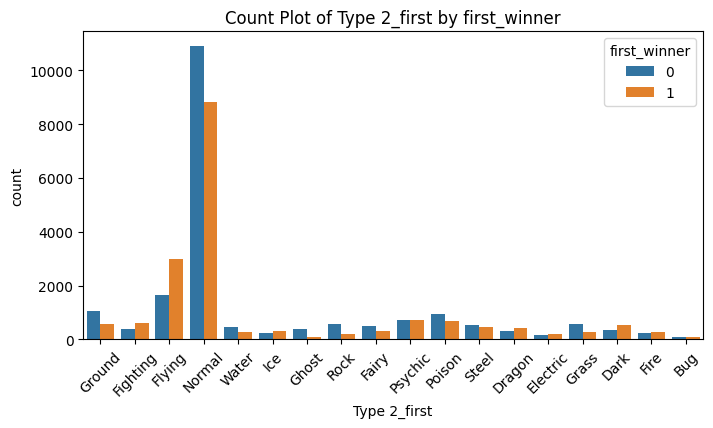

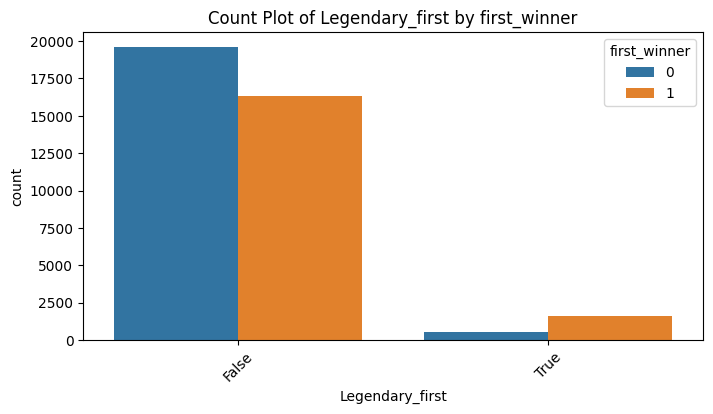

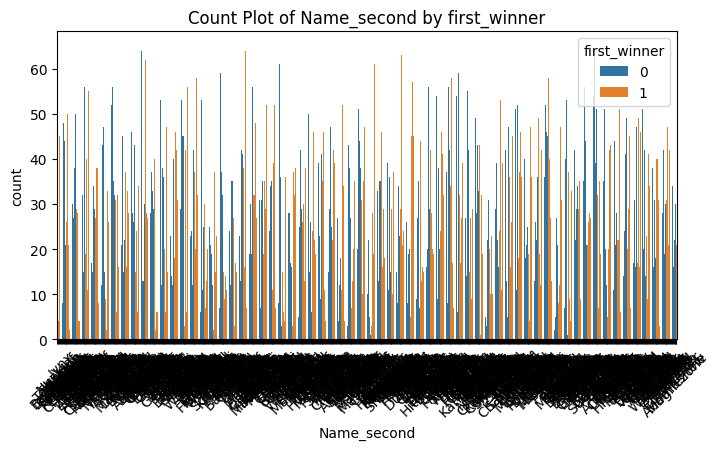

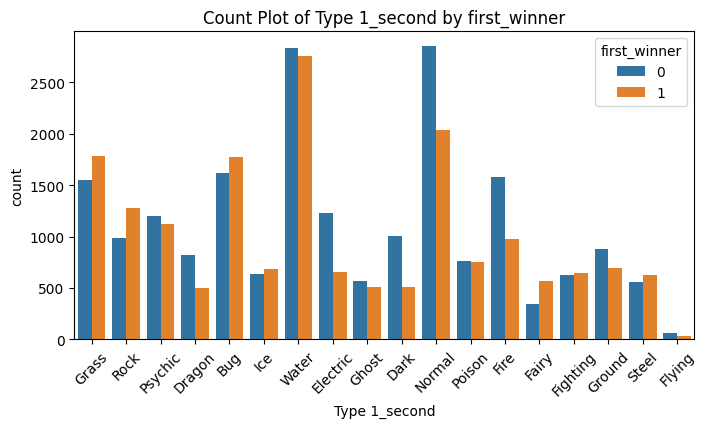

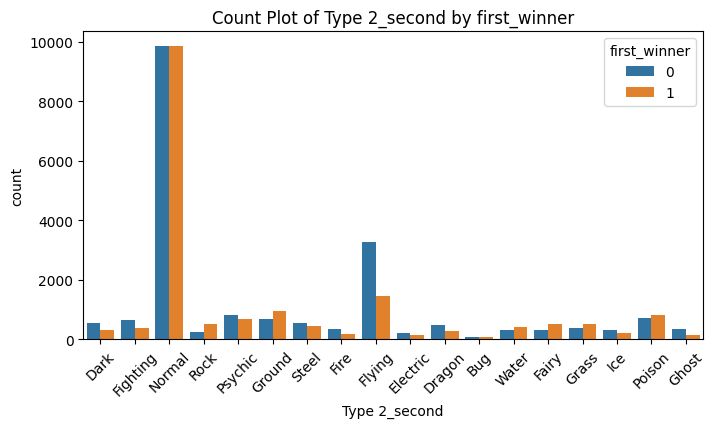

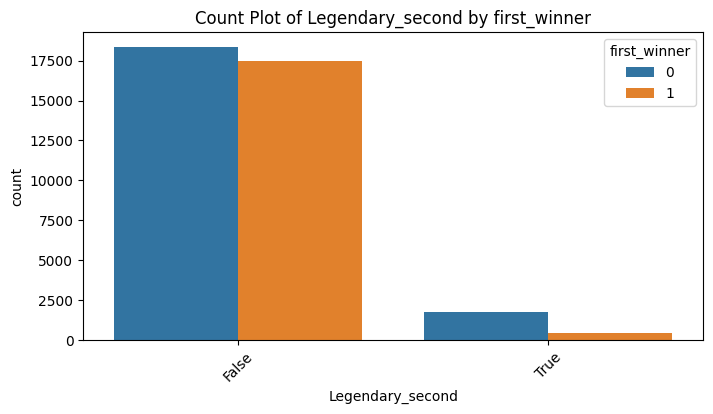

In [ ]:
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, hue='first_winner')
    plt.title(f'Count Plot of {col} by first_winner')
    plt.xticks(rotation=45)
    plt.show()

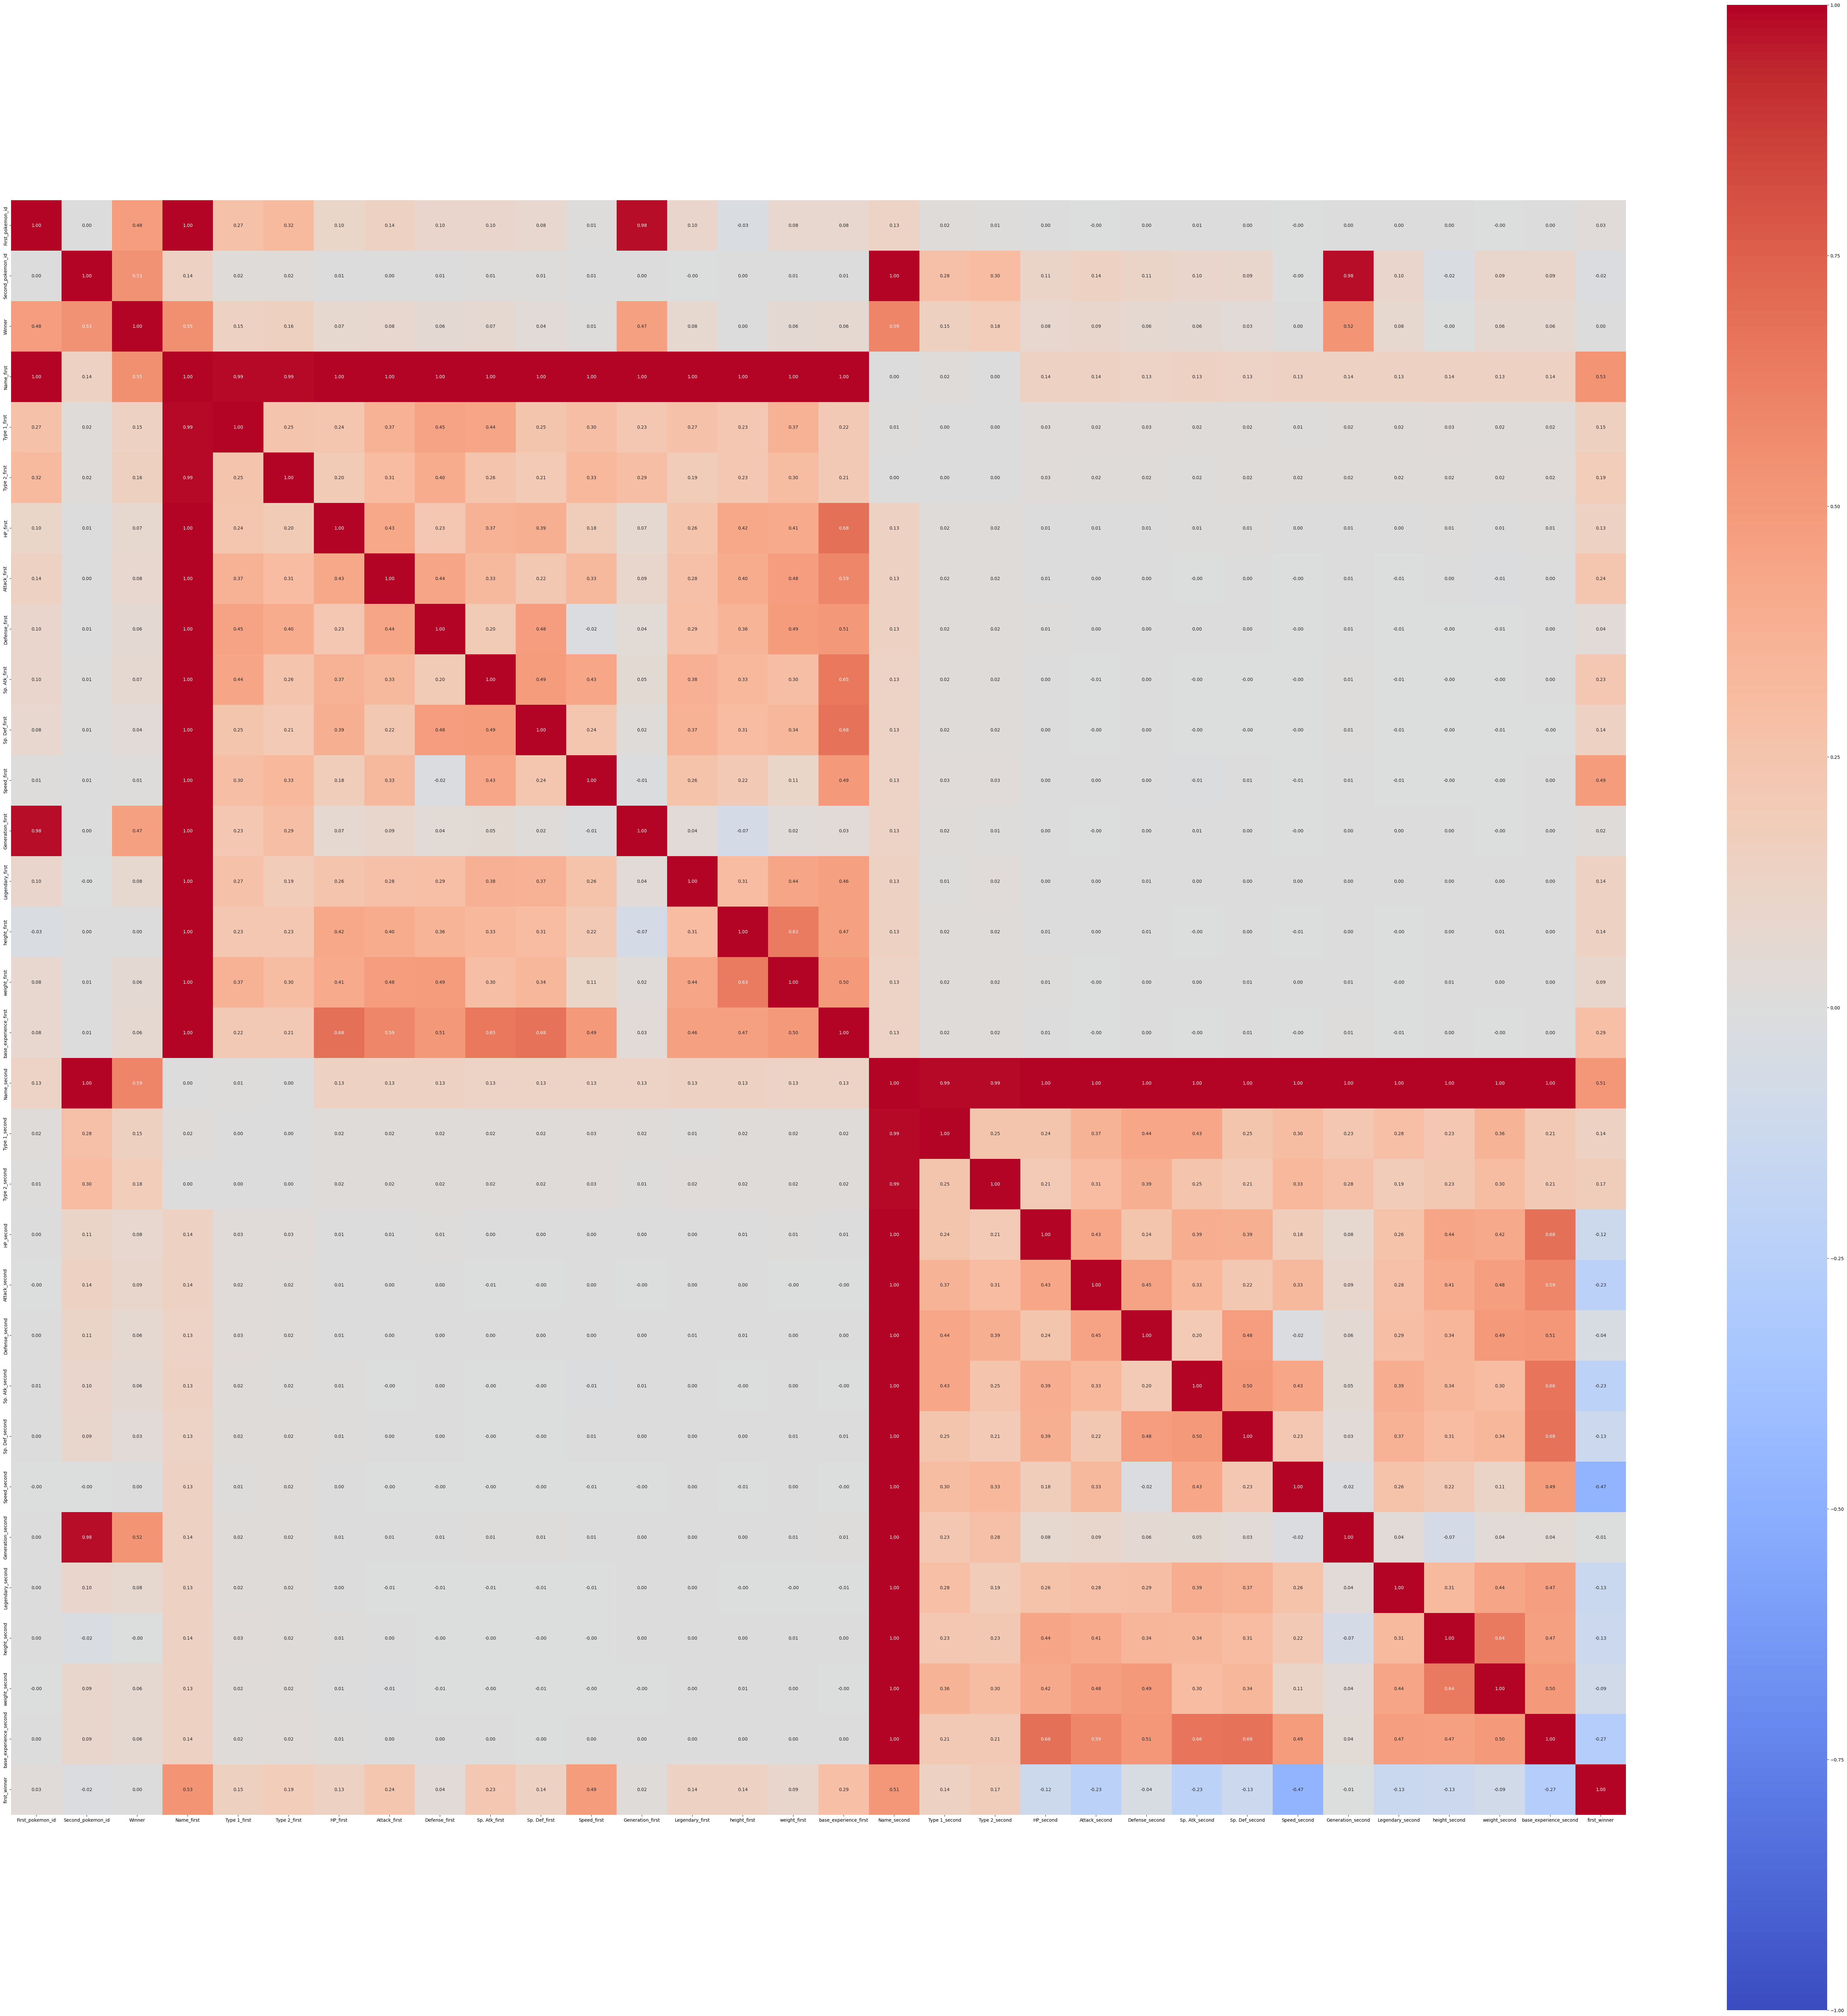

{'corr':                         First_pokemon_id  Second_pokemon_id    Winner  \
 First_pokemon_id                1.000000           0.002996  0.476738   
 Second_pokemon_id               0.002996           1.000000  0.532373   
 Winner                          0.476738           0.532373  1.000000   
 Name_first                      1.000000           0.138030  0.552310   
 Type 1_first                    0.271190           0.019494  0.145122   
 Type 2_first                    0.318749           0.019987  0.155753   
 HP_first                        0.103550           0.005108  0.070673   
 Attack_first                    0.136371           0.004269  0.078618   
 Defense_first                   0.099111           0.006197  0.060461   
 Sp. Atk_first                   0.099928           0.010067  0.067680   
 Sp. Def_first                   0.079881           0.009111  0.036197   
 Speed_first                     0.014201           0.005119  0.014535   
 Generation_first             

In [ ]:
associations(no_bool_df, nominal_columns='auto', figsize=(80,80), cmap='coolwarm', plot=True)

# **5. Data Preprocessing**

Pada tahap ini dilakukan preprocessing dataset agar siap digunakan pada machinelearning

## Menghapus kolom

In [ ]:
df = df.drop(columns=['First_pokemon_id', 'Second_pokemon_id', 'Name_first', 'Name_second'])

kode tersebut dihapus karena merupakan pengenal dari pokemon dan tidak akan dibutuhkan dalam proses selanjutnya

## Menghapus data duplikat

In [ ]:
# Jumlah baris duplikat (selain kemunculan pertama)
jumlah_duplikat = df.duplicated().sum()
print(f"Jumlah baris duplikat: {jumlah_duplikat}")

Jumlah baris duplikat: 1516


In [ ]:
# Hapus baris duplikat, simpan hasilnya ke DataFrame baru atau timpa yang lama
df = df.drop_duplicates()

# Jumlah baris duplikat setelah dihapus
jumlah_duplikat = df.duplicated().sum()
print(f"Jumlah baris duplikat: {jumlah_duplikat}")

# Cek jumlah baris setelah dihapus
print(f"Jumlah baris setelah dihapus duplikat: {len(df)}")


Jumlah baris duplikat: 0
Jumlah baris setelah dihapus duplikat: 36538


Label encoding

In [ ]:
categorical_cols = df.select_dtypes(include=['object', 'category','boolean']).columns.tolist()

In [ ]:


le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


In [ ]:
df

,Winner,Type 1_first,Type 2_first,HP_first,Attack_first,Defense_first,Sp. Atk_first,Sp. Def_first,Speed_first,Generation_first,Legendary_first,height_first,weight_first,base_experience_first,Type 1_second,Type 2_second,HP_second,Attack_second,Defense_second,Sp. Atk_second,Sp. Def_second,Speed_second,Generation_second,Legendary_second,height_second,weight_second,base_experience_second
0,298,15,10,50,64,50,45,50,41,2,0,6,720,60,9,1,70,70,40,60,40,60,3,0,10,280,119
1,701,9,5,91,90,72,90,129,108,5,1,20,2000,261,15,5,91,129,90,72,90,108,5,1,19,2600,261
2,668,4,7,55,40,85,80,105,40,2,0,6,32,142,14,12,75,75,75,125,95,40,5,0,10,345,170
3,683,6,12,40,40,40,70,40,20,2,0,7,350,50,2,12,77,120,90,60,90,48,5,0,16,1390,170
4,151,15,17,70,60,125,115,70,55,1,0,10,350,173,0,15,20,10,230,10,230,5,2,0,6,205,177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38048,728,12,12,38,36,38,32,36,57,6,0,4,50,47,13,2,65,75,90,97,123,44,6,0,18,815,173
38049,681,0,3,50,47,50,57,50,65,5,0,1,6,64,5,12,45,85,50,55,50,65,5,0,9,200,70
38050,707,2,6,100,120,100,150,120,90,5,1,32,3300,306,17,12,30,40,70,70,25,60,1,0,4,80,59
38051,589,10,12,60,85,40,30,45,68,5,0,3,85,66,3,12,35,55,40,45,40,60,5,0,2,3,55


## Standarisasi

In [ ]:


# Ambil semua kolom numerik (termasuk hasil encoding)
numeric_cols =df.select_dtypes(include=['number']).columns

# Normalisasi Min-Max (0-1)
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [ ]:
df

,Winner,Type 1_first,Type 2_first,HP_first,Attack_first,Defense_first,Sp. Atk_first,Sp. Def_first,Speed_first,Generation_first,Legendary_first,height_first,weight_first,base_experience_first,Type 1_second,Type 2_second,HP_second,Attack_second,Defense_second,Sp. Atk_second,Sp. Def_second,Speed_second,Generation_second,Legendary_second,height_second,weight_second,base_experience_second
0,0.371715,0.882353,0.588235,0.192913,0.36875,0.200000,0.243056,0.142857,0.232258,0.2,0.0,0.034722,0.075692,0.041958,0.529412,0.058824,0.271654,0.40625,0.155556,0.347222,0.095238,0.354839,0.4,0.0,0.062500,0.029372,0.145105
1,0.876095,0.529412,0.294118,0.354331,0.53125,0.297778,0.555556,0.519048,0.664516,0.8,1.0,0.131944,0.210443,0.393357,0.882353,0.294118,0.354331,0.77500,0.377778,0.430556,0.333333,0.664516,0.8,1.0,0.125000,0.273608,0.393357
2,0.834793,0.235294,0.411765,0.212598,0.21875,0.355556,0.486111,0.404762,0.225806,0.2,0.0,0.034722,0.003264,0.185315,0.823529,0.705882,0.291339,0.43750,0.311111,0.798611,0.357143,0.225806,0.8,0.0,0.062500,0.036214,0.234266
3,0.853567,0.352941,0.705882,0.153543,0.21875,0.155556,0.416667,0.095238,0.096774,0.2,0.0,0.041667,0.036741,0.024476,0.117647,0.705882,0.299213,0.71875,0.377778,0.347222,0.333333,0.277419,0.8,0.0,0.104167,0.146226,0.234266
4,0.187735,0.882353,1.000000,0.271654,0.34375,0.533333,0.729167,0.238095,0.322581,0.0,0.0,0.062500,0.036741,0.239510,0.000000,0.882353,0.074803,0.03125,1.000000,0.000000,1.000000,0.000000,0.2,0.0,0.034722,0.021476,0.246503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38048,0.909887,0.705882,0.705882,0.145669,0.19375,0.146667,0.152778,0.076190,0.335484,1.0,0.0,0.020833,0.005158,0.019231,0.764706,0.117647,0.251969,0.43750,0.377778,0.604167,0.490476,0.251613,1.0,0.0,0.118056,0.085693,0.239510
38049,0.851064,0.000000,0.176471,0.192913,0.26250,0.200000,0.326389,0.142857,0.387097,0.8,0.0,0.000000,0.000526,0.048951,0.294118,0.705882,0.173228,0.50000,0.200000,0.312500,0.142857,0.387097,0.8,0.0,0.055556,0.020950,0.059441
38050,0.883605,0.117647,0.352941,0.389764,0.71875,0.422222,0.972222,0.476190,0.548387,0.8,1.0,0.215278,0.347300,0.472028,1.000000,0.705882,0.114173,0.21875,0.288889,0.416667,0.023810,0.354839,0.0,0.0,0.020833,0.008317,0.040210
38051,0.735920,0.588235,0.705882,0.232283,0.50000,0.155556,0.138889,0.119048,0.406452,0.8,0.0,0.013889,0.008843,0.052448,0.176471,0.705882,0.133858,0.31250,0.155556,0.243056,0.095238,0.354839,0.8,0.0,0.006944,0.000211,0.033217


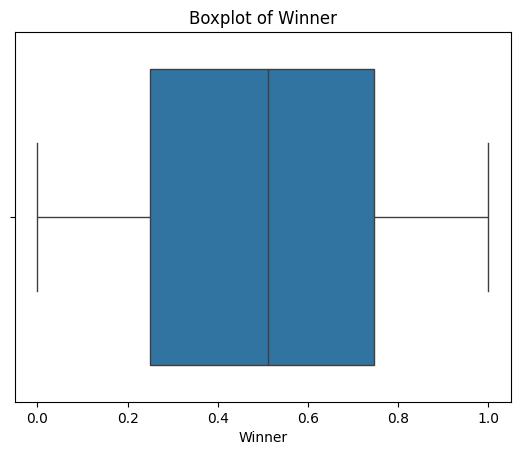

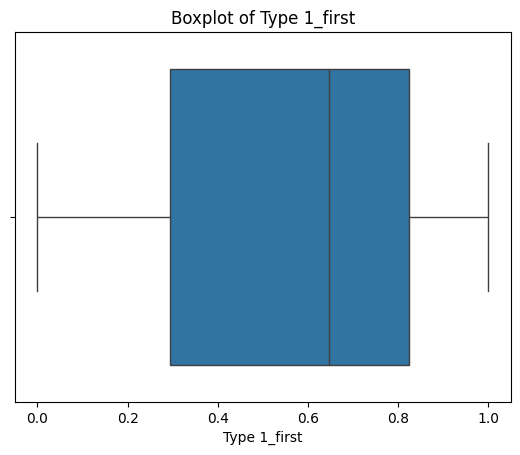

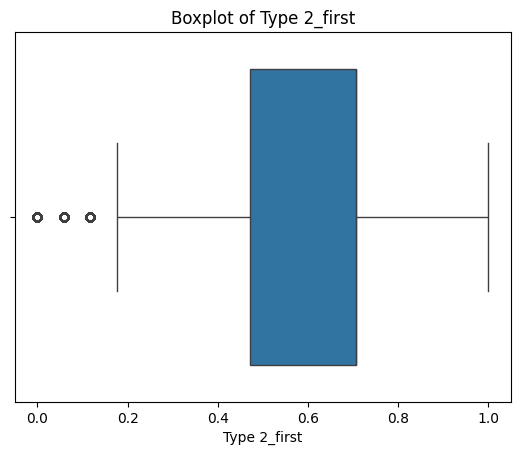

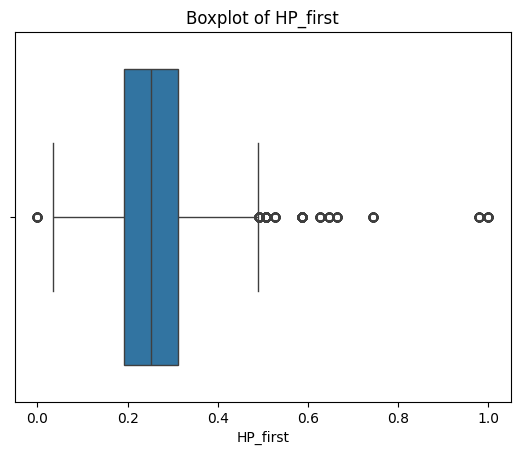

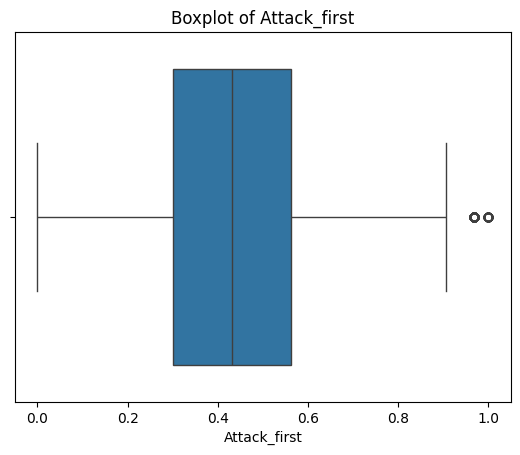

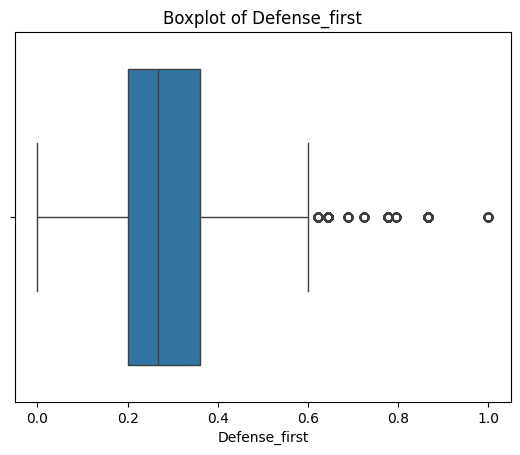

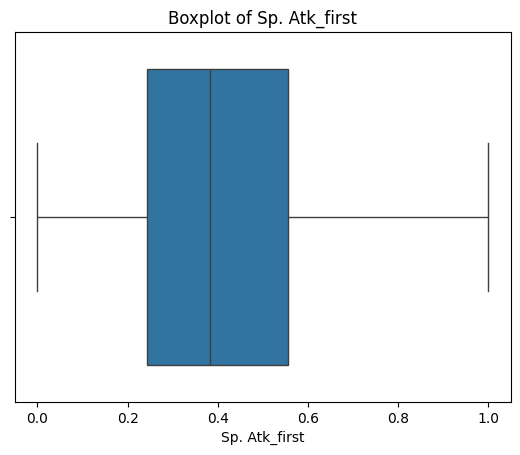

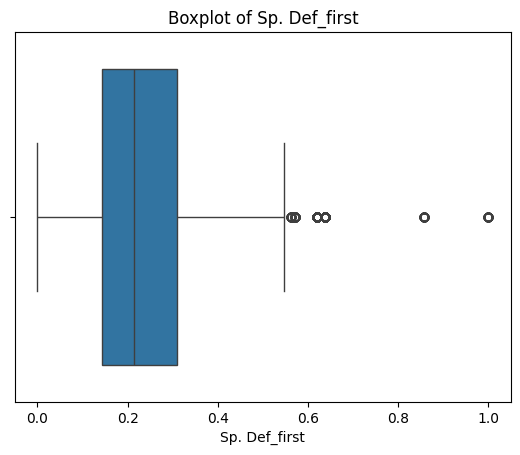

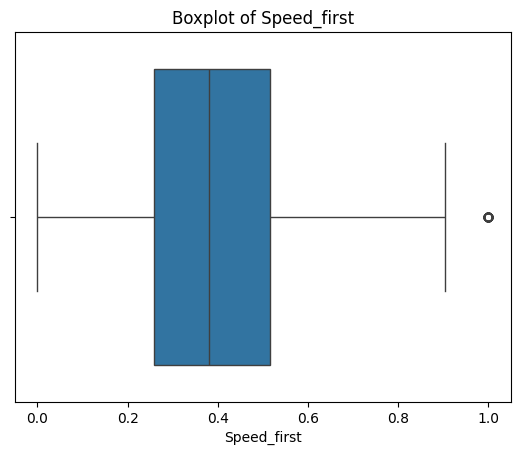

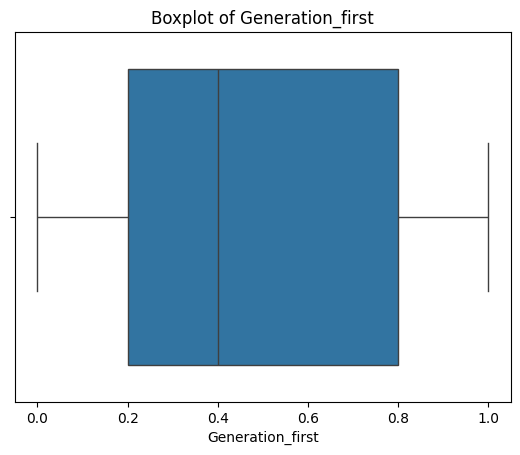

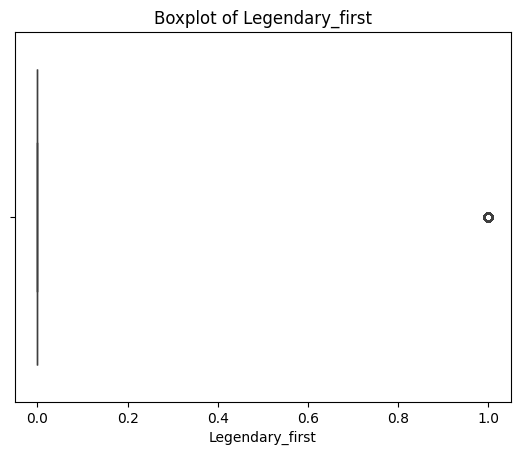

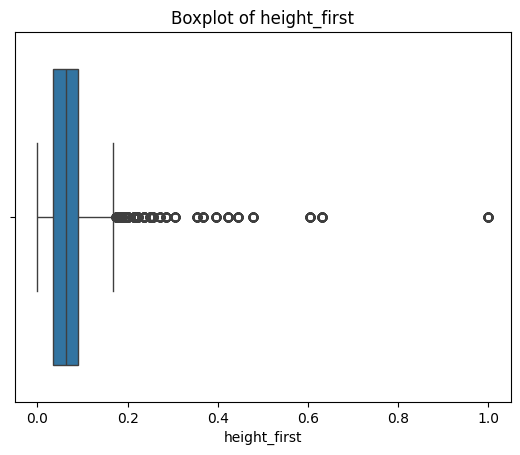

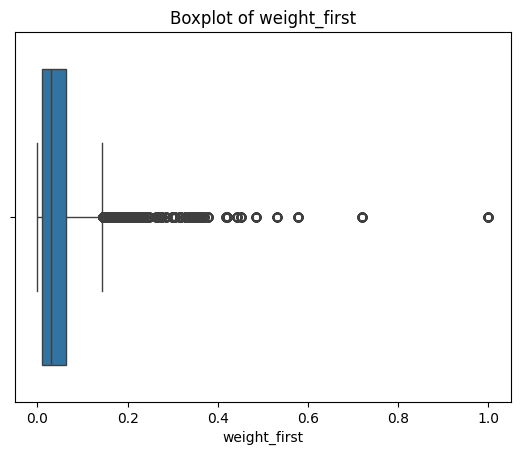

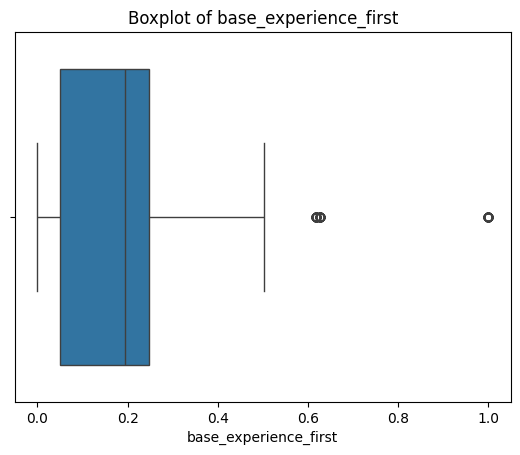

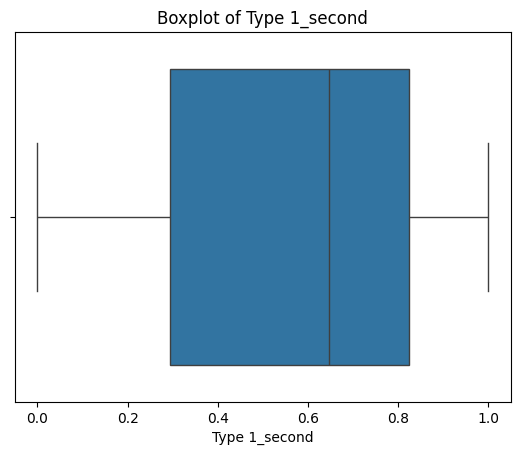

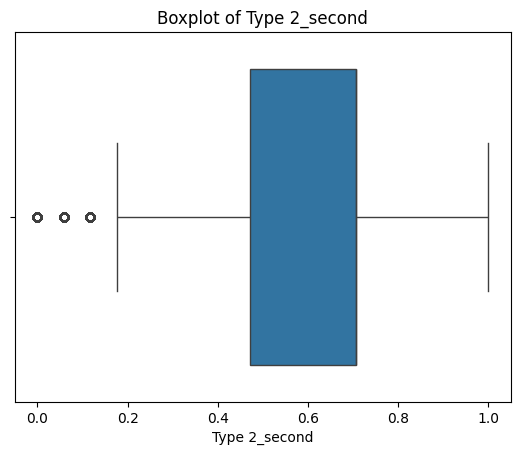

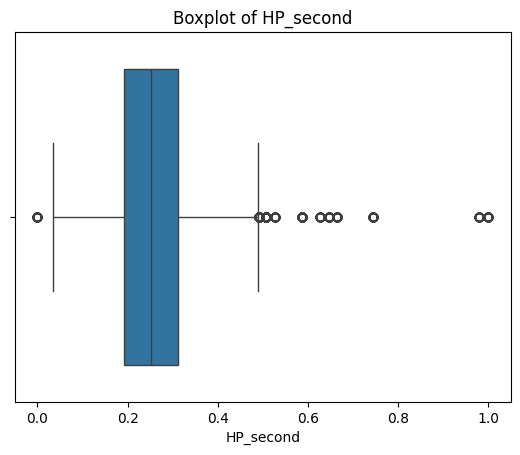

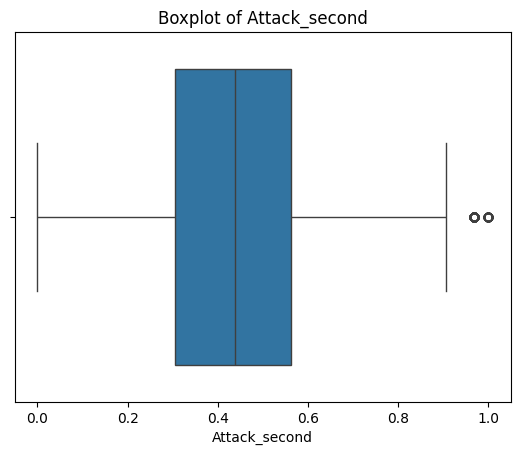

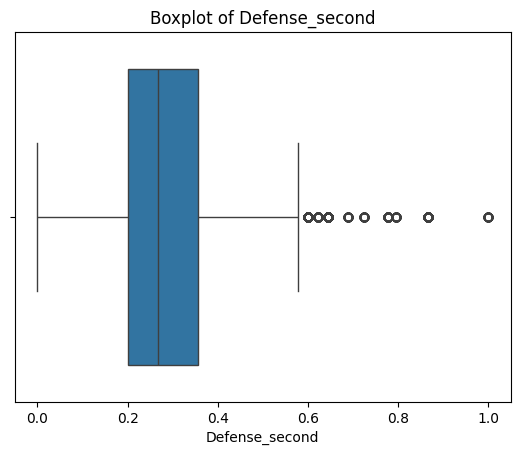

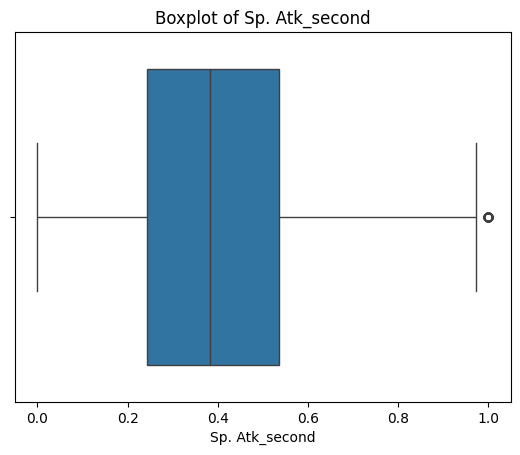

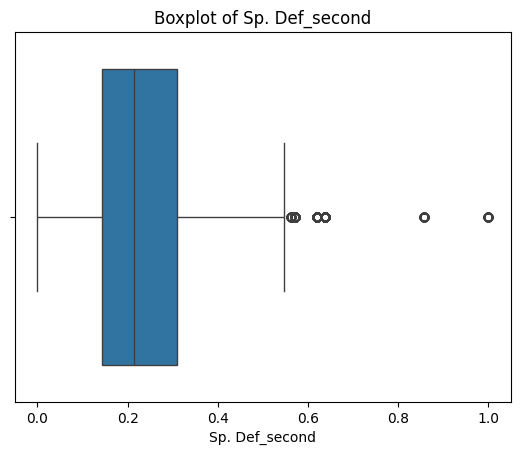

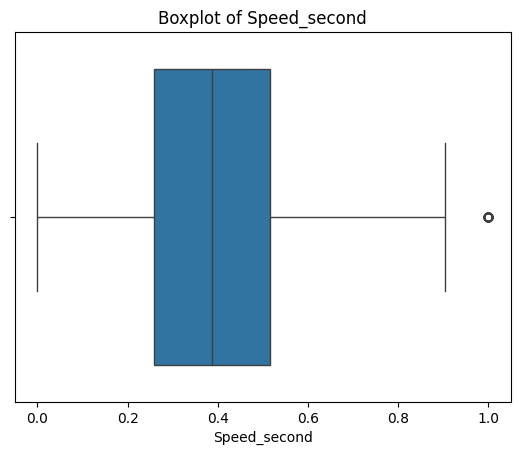

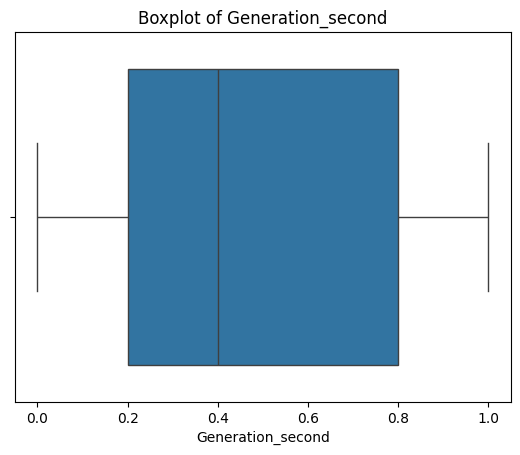

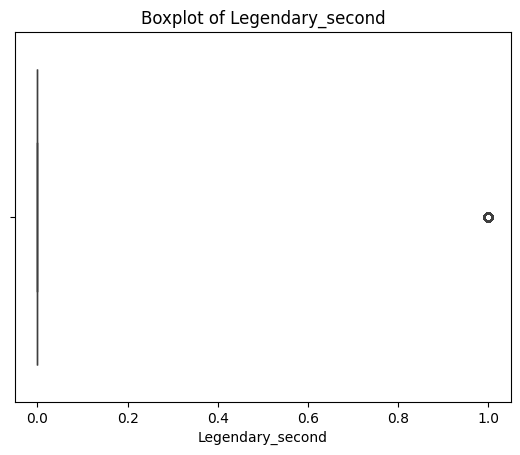

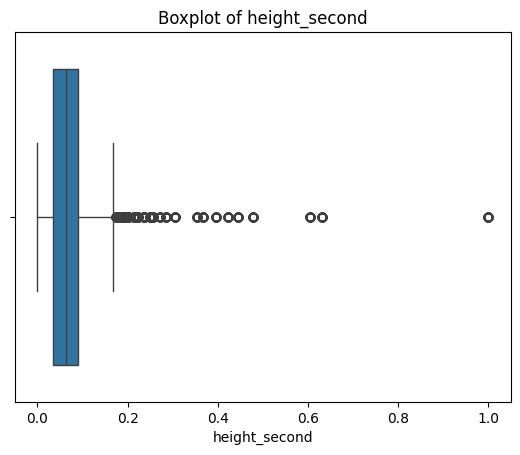

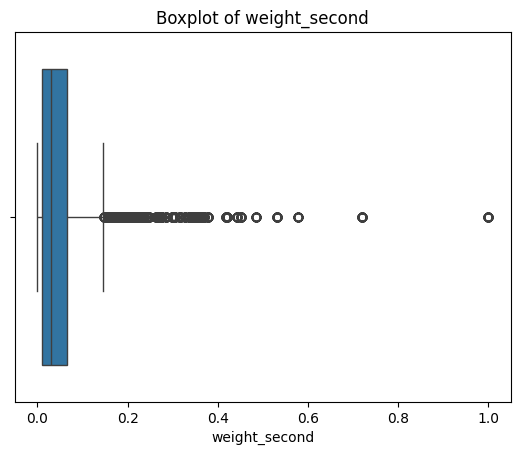

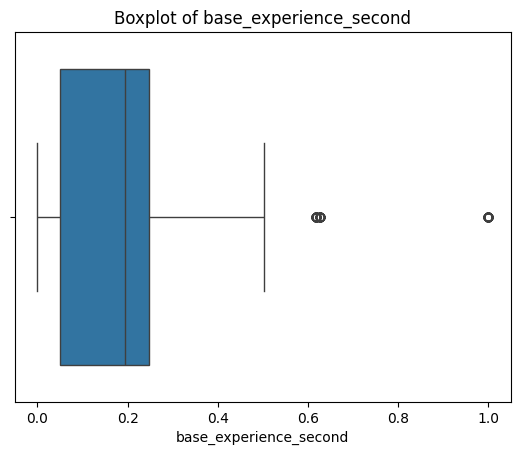

In [ ]:
numeric_cols = df.select_dtypes(include=['number']).columns
for col in numeric_cols:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


## Menyimpan dataframe akhir

In [ ]:

#simpan dataframe
df.to_csv('pokemon_dataset_preprocessing.csv', index=False)